In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os as os
import tensorflow as ts
import tensorflow.keras as ks
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Read in Data


In [2]:
# read in data
df = pd.read_csv("./processed_data/pca_data.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cinderella                 478 non-null    float64
 1   Number of Tournament Wins  478 non-null    float64
 2   3pt_0                      478 non-null    float64
 3   Free Throw-Rebound_0       478 non-null    float64
 4   Free Throw-Rebound_1       478 non-null    float64
 5   Free Throw-Rebound_2       478 non-null    float64
 6   Region_0                   478 non-null    float64
 7   PPG_0                      478 non-null    float64
 8   PPG_1                      478 non-null    float64
 9   Scoring Differential_0     478 non-null    float64
 10  Assist_0                   478 non-null    float64
 11  Schedule_0                 478 non-null    float64
 12  Win-Loss_0                 478 non-null    float64
dtypes: float64(13)
memory usage: 52.3 KB


## Create Model

### Neural Network

- Several fully-connected layers
    - Try 256, 128, 64, 32, 7/11
    
- In `.fit()`, 
    - use `sample_weights` parameter to weight certain outputs as worth more than others.
    - use `validation_split` to automatically set aside data for validation
    - use `shuffle` for shuffling samples when training

#### Output

##### Win-based

- 7 output nodes, predict number of wins (0-6)
    - Can look at problem as Classification
        - Use `y_dum` for predictions
        - Loss functions:
            - Categorical Cross Entropy: `categorical_crossentropy`
                - got around 99% accuracy at 300 epochs
            - KL Divergence: `kl_divergence`
                - got around 52% accuracy with `y` data at 300 epochs
                - got around 99% accuracy with `y_dum` data at 300 epochs
    - Can look at problem as Regression
        - Use `y` for predictions...maybe(?)
        - Loss functions:
            - Mean Squared Error: `mean_squared_error`
                - got around 25-30% accuracy with `y` at 300 epochs
                - actually works better with `y_dum` data
                    - got around 95% accuracy with 300 epochs
            - Sparse Categorical Cross Entropy: `sparse_categorical_crossentropy`
                - can only use `y` data
                - got around 99-100% accuracy at 300 epochs
            - Mean Absolute Error: `mean_absolute_error`
                - got around 66% accuracy with `y_dum` data at 300 epochs
                - got around 1% accuracy with `y` data at 300 epochs
- Apply softmax function at final layer to get probability distribution

##### Rank-based

- Find the optimal ranking of teams for each year
- 11 output nodes, predict which rank (0-10) the team should be placed in

#### Todo

- Use hyperparameterized, class-based optimization function, not just `adam` string.
- Try adding a layer of 512 nodes before layer of 256
- Use cross validation to ensure that the model is not overfitting
    - Train on pre-2021 data then use of 2021 to validate
- Use `sample_weights` hyperparameter to give more weight to higher win values
- Analyze output to see if model is under/overpredicting for misses
- Create datasets for what the optimal team selections are.


#### Misc Code

- Plot network with `ks.utils.plot_model(model, show_shapes=True)`
- Show summary with `model.summary()`

In [54]:
X = df.drop(columns=['Cinderella','Number of Tournament Wins'])
# y = df[['Cinderella','Number of Tournament Wins']]
y_dum = pd.get_dummies(df['Number of Tournament Wins'])
y = df['Number of Tournament Wins']

In [76]:
# Classification based

model_1 = ks.Sequential()

model_1.add(layers.Input(shape=X.shape[1], name='input'))

model_1.add(layers.Dense(256, activation='relu6', kernel_regularizer = ks.regularizers.l2(.0001)))

model_1.add(layers.Dropout(0.1))

model_1.add(layers.Dense(128, activation='relu6', kernel_regularizer = ks.regularizers.l2(.0001)))

model_1.add(layers.Dropout(0.05))

model_1.add(layers.Dense(64, activation='relu6', kernel_regularizer = ks.regularizers.l2(.0001)))

model_1.add(layers.Dropout(0.05))

model_1.add(layers.Dense(32, activation='relu6', kernel_regularizer = ks.regularizers.l2(.0001)))

model_1.add(layers.Dense(7, activation='softmax'))


In [77]:
model_1.compile(optimizer='adam', metrics=['accuracy'], loss='mean_absolute_error')
res = model_1.fit(X,y_dum, epochs = 300, batch_size = 32)

Epoch 1/300
15/15 [==============================] - 1s 2ms/step - loss: 0.2415 - accuracy: 0.4665
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.5272
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.5272
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.5272
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.5272
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.5272
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.5272
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.5272
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.5272
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.5314
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.6590
Epoch 83/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.6611
Epoch 84/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.6611
Epoch 85/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.6611
Epoch 86/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.6611
Epoch 87/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.6590
Epoch 88/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.6527
Epoch 89/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.6464
Epoch 90/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.6527
Epoch 91/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.6611
Epoch 92/300


15/15 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.6590
Epoch 164/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.6548
Epoch 165/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.6611
Epoch 166/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.6653
Epoch 167/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.6590
Epoch 168/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.6611
Epoch 169/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.6590
Epoch 170/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.6632
Epoch 171/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.6653
Epoch 172/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.6632
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.6653
Epoch 245/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.6611
Epoch 246/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.6569
Epoch 247/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.6548
Epoch 248/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.6548
Epoch 249/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.6527
Epoch 250/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.6590
Epoch 251/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.6611
Epoch 252/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.6632
Epoch 253/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.6590
Epoc

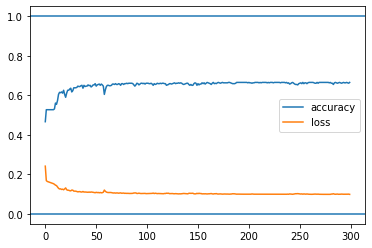

In [78]:
plt.plot(res.epoch, res.history['accuracy'], label='accuracy')
plt.plot(res.epoch, res.history['loss'], label='loss')
plt.axhline(y=0)
plt.axhline(y=1)
plt.legend()
plt.show()

## Validate Results

- Want to pick several Cinderella teams for bottom 4-6 predictions


## Save Model

- Save model to file along with relevant data